In [691]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

customers = pd.read_csv("customers.csv")
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [618]:
products = pd.read_csv("products.csv")
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [619]:
products1 = products.drop(products.index[731])
products1

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [620]:
transactions = pd.read_csv("transactions.csv")
transactions

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242
...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5


In [621]:
transactions.duplicated().sum()

126

In [622]:
#jointure production et transaction
prod_trans = pd.merge(products1, transactions, how="outer", on="id_prod")
prod_trans

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0.0,2021-05-12 23:26:29.885083,s_33709,c_7954
1,0_1421,19.99,0.0,2022-01-25 11:27:39.357012,s_154957,c_254
2,0_1421,19.99,0.0,2022-01-02 22:29:33.796003,s_144068,c_5770
3,0_1421,19.99,0.0,2021-03-05 17:10:40.265676,s_2187,c_1455
4,0_1421,19.99,0.0,2021-03-29 13:55:04.422637,s_13112,c_2768
...,...,...,...,...,...,...
337033,0_2245,NaN,NaN,2021-04-06 19:59:19.462288,s_16936,c_4167
337034,0_2245,NaN,NaN,2021-03-30 23:29:02.347672,s_13738,c_7790
337035,0_2245,NaN,NaN,2021-12-03 14:14:40.444177,s_128815,c_6189
337036,0_2245,NaN,NaN,2021-04-27 18:58:47.703374,s_26624,c_1595


In [623]:
cust_trans = pd.merge(transactions, customers, how="outer", on="client_id")
cust_trans

,id_prod,date,session_id,client_id,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977
1,1_596,2021-09-12 02:11:24.774608,s_88567,c_4450,f,1977
2,1_278,2021-09-10 15:09:01.555889,s_87835,c_4450,f,1977
3,0_1447,2021-05-25 00:17:56.841054,s_39094,c_4450,f,1977
4,0_1357,2021-08-01 10:43:25.039433,s_69919,c_4450,f,1977
...,...,...,...,...,...,...
337032,NaN,NaN,NaN,c_862,f,1956
337033,NaN,NaN,NaN,c_7584,f,1960
337034,NaN,NaN,NaN,c_90,m,2001
337035,NaN,NaN,NaN,c_587,m,1993


In [624]:
cust_trans_prod = pd.merge(prod_trans, customers, how="outer", on="client_id")
cust_trans_prod

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2021-05-12 23:26:29.885083,s_33709,c_7954,m,1973.0
1,0_1142,3.42,0.0,2021-03-24 00:54:59.507581,s_10590,c_7954,m,1973.0
2,0_1446,8.09,0.0,2021-11-26 18:04:33.019608,s_125461,c_7954,m,1973.0
3,0_2291,12.99,0.0,2021-05-29 18:25:02.094891,s_41299,c_7954,m,1973.0
4,1_385,25.99,1.0,2021-06-01 20:41:40.157683,s_42731,c_7954,m,1973.0
...,...,...,...,...,...,...,...,...
337054,NaN,NaN,NaN,NaN,NaN,c_862,f,1956.0
337055,NaN,NaN,NaN,NaN,NaN,c_7584,f,1960.0
337056,NaN,NaN,NaN,NaN,NaN,c_90,m,2001.0
337057,NaN,NaN,NaN,NaN,NaN,c_587,m,1993.0


# Calcule produits non vendu et les clients qui n'ont pas commande

In [625]:
#l'extraction des produits qui n'ont jamais été vendus
produits_non_vendus = prod_trans[pd.isnull(prod_trans["session_id"])]
produits_non_vendus

,id_prod,price,categ,date,session_id,client_id
19685,0_1016,35.06,0.0,NaN,NaN,NaN
31123,0_1780,1.67,0.0,NaN,NaN,NaN
80898,0_1062,20.08,0.0,NaN,NaN,NaN
88224,0_1119,2.99,0.0,NaN,NaN,NaN
90039,0_1014,1.15,0.0,NaN,NaN,NaN
93444,1_0,31.82,1.0,NaN,NaN,NaN
114536,0_1318,20.92,0.0,NaN,NaN,NaN
125973,0_1800,22.05,0.0,NaN,NaN,NaN
144152,0_1645,2.99,0.0,NaN,NaN,NaN
159269,0_322,2.99,0.0,NaN,NaN,NaN


In [626]:
len(produits_non_vendus)

22

In [766]:
aucune_commande = cust_trans[pd.isnull(cust_trans["session_id"])]
aucune_commande

,id_prod,date,session_id,client_id,sex,birth
337016,NaN,NaN,NaN,c_8253,f,2001
337017,NaN,NaN,NaN,c_3789,f,1997
337018,NaN,NaN,NaN,c_4406,f,1998
337019,NaN,NaN,NaN,c_2706,f,1967
337020,NaN,NaN,NaN,c_3443,m,1959
337021,NaN,NaN,NaN,c_4447,m,1956
337022,NaN,NaN,NaN,c_3017,f,1992
337023,NaN,NaN,NaN,c_4086,f,1992
337024,NaN,NaN,NaN,c_6930,m,2004
337025,NaN,NaN,NaN,c_4358,m,1999


In [628]:
len(aucune_commande)

21

# Moyenne et Median

In [631]:
#calcule la moyenne par categorie
moyenne_par_categorie = products1.groupby(products1["categ"]).mean()
moyenne_par_categorie = moyenne_par_categorie.reset_index()
moyenne_par_categorie

,categ,price
0,0,11.732795
1,1,25.531421
2,2,108.354686


In [634]:
#Moyenne categorie 0
moyenne_par_categorie_0 = moyenne_par_categorie.iloc[0]
moyenne_par_categorie_0

categ     0.000000
price    11.732795
Name: 0, dtype: float64

In [635]:
#Moyenne categorie 2
moyenne_par_categorie_2 = moyenne_par_categorie.iloc[2]
moyenne_par_categorie_2

categ      2.000000
price    108.354686
Name: 2, dtype: float64

In [636]:
#Median par categories
median_par_categ = products1.groupby(products1["categ"]).median()
median_par_categ = median_par_categ.reset_index()
median_par_categ

,categ,price
0,0,10.32
1,1,22.99
2,2,101.99


In [637]:
#Median categorie 0
median_par_categ.iloc[0]

categ     0.00
price    10.32
Name: 0, dtype: float64

# Joiture final - Nettoyage et attribut valeur a 0_2245

In [638]:
#jointure total 
cust_trans_prod = pd.merge(prod_trans, customers, how="inner", on="client_id")
cust_trans_prod

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2021-05-12 23:26:29.885083,s_33709,c_7954,m,1973
1,0_1142,3.42,0.0,2021-03-24 00:54:59.507581,s_10590,c_7954,m,1973
2,0_1446,8.09,0.0,2021-11-26 18:04:33.019608,s_125461,c_7954,m,1973
3,0_2291,12.99,0.0,2021-05-29 18:25:02.094891,s_41299,c_7954,m,1973
4,1_385,25.99,1.0,2021-06-01 20:41:40.157683,s_42731,c_7954,m,1973
...,...,...,...,...,...,...,...,...
337011,T_0,NaN,NaN,test_2021-03-01 02:30:02.237437,s_0,ct_0,f,2001
337012,T_0,NaN,NaN,test_2021-03-01 02:30:02.237438,s_0,ct_0,f,2001
337013,T_0,NaN,NaN,test_2021-03-01 02:30:02.237436,s_0,ct_0,f,2001
337014,T_0,NaN,NaN,test_2021-03-01 02:30:02.237445,s_0,ct_0,f,2001


In [639]:
#supprimer les valeurs nulles
cust_trans_prod_clean = cust_trans_prod.dropna()

In [641]:
#attribuer le price de 11.7 pour la categorie 0_2245
products1.loc[len(products1)] == ["0_2245", 11.7, 0]
products1

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [642]:
cust_trans_prod_clean

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2021-05-12 23:26:29.885083,s_33709,c_7954,m,1973
1,0_1142,3.42,0.0,2021-03-24 00:54:59.507581,s_10590,c_7954,m,1973
2,0_1446,8.09,0.0,2021-11-26 18:04:33.019608,s_125461,c_7954,m,1973
3,0_2291,12.99,0.0,2021-05-29 18:25:02.094891,s_41299,c_7954,m,1973
4,1_385,25.99,1.0,2021-06-01 20:41:40.157683,s_42731,c_7954,m,1973
...,...,...,...,...,...,...,...,...
336811,0_142,19.85,0.0,2021-09-25 18:07:25.880052,s_95415,c_1232,f,1960
336812,2_181,57.99,2.0,2021-08-05 23:36:00.315963,s_71886,c_6837,f,1995
336813,1_367,13.99,1.0,2021-09-05 06:20:52.920885,s_85267,c_5962,f,1997
336814,2_163,68.99,2.0,2022-01-28 16:51:07.389515,s_156517,c_7739,m,1997


In [644]:
#Affichage des 4 meilleurs clients
df_final.tail(4)

,client_id,price,categ,birth
8596,c_3454,54442.92,0.0,1980.0
8597,c_6714,73197.34,0.0,1980.0
8598,c_4958,144257.21,0.0,1980.0
8599,c_1609,162007.34,0.0,1980.0


### Calcule Correlation

In [645]:
#la corrélation entre le genre d’un client et les catégories des livres achetés
genre_categ_livre_achete = pd.DataFrame({"Genre" : cust_trans_prod_clean["sex"] ,"livre_achete": cust_trans_prod_clean["categ"]})
genre_categ_livre_achete["Genre"] = genre_categ_livre_achete["Genre"].map({"m": 1, "f": 0})
genre_categ_livre_achete

,Genre,livre_achete
0,1,0.0
1,1,0.0
2,1,0.0
3,1,0.0
4,1,1.0
...,...,...
336811,0,0.0
336812,0,2.0
336813,0,1.0
336814,1,2.0


In [646]:
correlation = genre_categ_livre_achete["livre_achete"].corr(genre_categ_livre_achete["Genre"])
correlation

0.0006886069122628277

# Calcule des Correlations

In [647]:
#groupement par client
group_client = cust_trans_prod_clean.groupby(cust_trans_prod_clean["client_id"]).agg({"price" : sum})
group_client = group_client.sort_values(by="price")
group_client = group_client.reset_index()
group_client

,client_id,price
0,c_8140,4.15
1,c_8114,4.99
2,c_1675,5.57
3,c_890,6.08
4,c_8351,6.31
...,...,...
8595,c_7959,2564.25
8596,c_3454,54442.92
8597,c_6714,73197.34
8598,c_4958,144257.21


In [673]:
#je veux ajouter les colone categ et birth a group_client par concatenation
group_client1= pd.merge(group_client, customers)
group_client1

,client_id,price,sex,birth
0,c_8140,4.15,m,1971
1,c_8114,4.99,m,1962
2,c_1675,5.57,f,2000
3,c_890,6.08,f,2002
4,c_8351,6.31,f,1968
...,...,...,...,...
8595,c_7959,2564.25,f,1974
8596,c_3454,54442.92,m,1969
8597,c_6714,73197.34,f,1968
8598,c_4958,144257.21,m,1999


In [667]:
frequence_session_id = cust_trans_prod_clean['client_id'].value_counts().reset_index()
frequence_session_id

,index,client_id
0,c_1609,12855
1,c_6714,4471
2,c_3454,3273
3,c_4958,2562
4,c_7959,195
...,...,...
8595,c_173,1
8596,c_8506,1
8597,c_712,1
8598,c_8140,1


In [669]:
frequence_session_id.rename(columns = {"index" : "client_id", "client_id" :"frequence" })

,client_id,frequence
0,c_1609,12855
1,c_6714,4471
2,c_3454,3273
3,c_4958,2562
4,c_7959,195
...,...,...
8595,c_173,1
8596,c_8506,1
8597,c_712,1
8598,c_8140,1


In [670]:
#groupement par client
frequence_session_id = cust_trans_prod_clean.groupby(cust_trans_prod_clean["client_id"]).agg({"session_id" : "nunique"})
frequence_session_id = frequence_session_id.sort_values(by="session_id")
frequence_session_id = frequence_session_id.reset_index()
#frequence_session_id.rename(columns={"session_id" : "frequence"})
frequence_session_id

,client_id,session_id
0,c_4540,1
1,c_2269,1
2,c_6247,1
3,c_6286,1
4,c_2896,1
...,...,...
8595,c_682,84
8596,c_6714,1286
8597,c_4958,1888
8598,c_3454,2709


In [671]:
cust_trans_prod_clean

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0.0,2021-05-12 23:26:29.885083,s_33709,c_7954,m,1973
1,0_1142,3.42,0.0,2021-03-24 00:54:59.507581,s_10590,c_7954,m,1973
2,0_1446,8.09,0.0,2021-11-26 18:04:33.019608,s_125461,c_7954,m,1973
3,0_2291,12.99,0.0,2021-05-29 18:25:02.094891,s_41299,c_7954,m,1973
4,1_385,25.99,1.0,2021-06-01 20:41:40.157683,s_42731,c_7954,m,1973
...,...,...,...,...,...,...,...,...
336811,0_142,19.85,0.0,2021-09-25 18:07:25.880052,s_95415,c_1232,f,1960
336812,2_181,57.99,2.0,2021-08-05 23:36:00.315963,s_71886,c_6837,f,1995
336813,1_367,13.99,1.0,2021-09-05 06:20:52.920885,s_85267,c_5962,f,1997
336814,2_163,68.99,2.0,2022-01-28 16:51:07.389515,s_156517,c_7739,m,1997


In [674]:
#concatenation entre df_final et frequence 
df_final1 = pd.merge(group_client1, frequence_session_id, on='client_id')
df_final1

,client_id,price,sex,birth,session_id
0,c_8140,4.15,m,1971,1
1,c_8114,4.99,m,1962,1
2,c_1675,5.57,f,2000,1
3,c_890,6.08,f,2002,1
4,c_8351,6.31,f,1968,1
...,...,...,...,...,...
8595,c_7959,2564.25,f,1974,76
8596,c_3454,54442.92,m,1969,2709
8597,c_6714,73197.34,f,1968,1286
8598,c_4958,144257.21,m,1999,1888


In [762]:
#calcule taille panier moyen 
df_final1["taille_panier_moyenne"] = df_final1["price"]/df_final1["session_id"]
df_final1

,client_id,price,sex,birth,session_id,Age,taille_panier_moyenne
0,c_8140,4.15,m,1971,1,53,4.150000
1,c_8114,4.99,m,1962,1,62,4.990000
2,c_1675,5.57,f,2000,1,24,5.570000
3,c_890,6.08,f,2002,1,22,6.080000
4,c_8351,6.31,f,1968,1,56,6.310000
...,...,...,...,...,...,...,...
8595,c_7959,2564.25,f,1974,76,50,33.740132
8596,c_3454,54442.92,m,1969,2709,55,20.097054
8597,c_6714,73197.34,f,1968,1286,56,56.918616
8598,c_4958,144257.21,m,1999,1888,25,76.407421


In [763]:
#calcule ages client
df_final1["Age"] = 2024- df_final1["birth"]
df_final1

,client_id,price,sex,birth,session_id,Age,taille_panier_moyenne
0,c_8140,4.15,m,1971,1,53,4.150000
1,c_8114,4.99,m,1962,1,62,4.990000
2,c_1675,5.57,f,2000,1,24,5.570000
3,c_890,6.08,f,2002,1,22,6.080000
4,c_8351,6.31,f,1968,1,56,6.310000
...,...,...,...,...,...,...,...
8595,c_7959,2564.25,f,1974,76,50,33.740132
8596,c_3454,54442.92,m,1969,2709,55,20.097054
8597,c_6714,73197.34,f,1968,1286,56,56.918616
8598,c_4958,144257.21,m,1999,1888,25,76.407421


In [719]:
## Calculer le montant dépensé par catégorie des livres achetés pour chaque client
montant_par_categorie = pd.pivot_table(cust_trans_prod_clean, values='price', index='client_id', columns='categ', aggfunc='sum').reset_index()
#montant_par_categorie1 =montant_par_categorie.rename(columns= {"categ_0" : "0.0"})
montant_par_categorie.fillna("0.0")

categ,client_id,0.0,1.0,2.0
0,c_1,174.2,71.58,54.87
1,c_10,124.92,391.27,69.99
2,c_100,31.38,52.96,138.53
3,c_1000,169.85,810.17,0.0
4,c_1001,527.81,274.64,300.0
...,...,...,...,...
8595,c_995,55.34,63.74,0.0
8596,c_996,204.7,534.9,0.0
8597,c_997,84.86,158.92,329.11
8598,c_998,88.17,108.06,1331.46


In [764]:
df_final2 = pd.merge(df_final1, montant_par_categorie)
df_final2.fillna(0.0, inplace=True)

In [765]:
df_final2 = df_final2.rename(columns ={"session_id" : "frequence" , 0.0:  "CA_categ_0" , 1.0: "CA_Categ_1" , 2.0: "CA_Categ_2"})
df_final2.fillna(0, inplace=True)
df_final2

,client_id,price,sex,birth,frequence,Age,taille_panier_moyenne,CA_categ_0,CA_Categ_1,CA_Categ_2
0,c_8140,4.15,m,1971,1,53,4.150000,4.15,0.00,0.00
1,c_8114,4.99,m,1962,1,62,4.990000,4.99,0.00,0.00
2,c_1675,5.57,f,2000,1,24,5.570000,5.57,0.00,0.00
3,c_890,6.08,f,2002,1,22,6.080000,6.08,0.00,0.00
4,c_8351,6.31,f,1968,1,56,6.310000,6.31,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
8595,c_7959,2564.25,f,1974,76,50,33.740132,1767.91,796.34,0.00
8596,c_3454,54442.92,m,1969,2709,55,20.097054,14196.35,39766.51,480.06
8597,c_6714,73197.34,f,1968,1286,56,56.918616,28218.49,34718.85,10260.00
8598,c_4958,144257.21,m,1999,1888,25,76.407421,45.77,19004.71,125206.73


In [682]:
#df_final3 = 
df_final2['Age'].value_counts()


20    437
45    215
36    207
38    203
46    199
     ... 
89      8
92      6
94      4
93      4
95      3
Name: Age, Length: 76, dtype: int64

In [722]:
df_final4 = df_final2.head(3)
df_final4

,client_id,price,sex,birth,frequence,taille_prix_moyenne,Age,taille_panier_moyenne,CA_categ_0,CA_Categ_1,CA_Categ_2
0,c_8140,4.15,m,1971,1,4.15,53,4.15,4.15,0.0,0.0
1,c_8114,4.99,m,1962,1,4.99,62,4.99,4.99,0.0,0.0
2,c_1675,5.57,f,2000,1,5.57,24,5.57,5.57,0.0,0.0


In [723]:
df_final3 = df_final2.tail(3)
df_final3

,client_id,price,sex,birth,frequence,taille_prix_moyenne,Age,taille_panier_moyenne,CA_categ_0,CA_Categ_1,CA_Categ_2
8597,c_6714,73197.34,f,1968,1286,56.918616,56,56.918616,28218.49,34718.85,10260.00
8598,c_4958,144257.21,m,1999,1888,76.407421,25,76.407421,45.77,19004.71,125206.73
8599,c_1609,162007.34,m,1980,5501,29.450525,44,29.450525,109657.03,52309.00,41.31


In [724]:
df_final5 = pd.concat([df_final3, df_final4])
df_final5

,client_id,price,sex,birth,frequence,taille_prix_moyenne,Age,taille_panier_moyenne,CA_categ_0,CA_Categ_1,CA_Categ_2
8597,c_6714,73197.34,f,1968,1286,56.918616,56,56.918616,28218.49,34718.85,10260.00
8598,c_4958,144257.21,m,1999,1888,76.407421,25,76.407421,45.77,19004.71,125206.73
8599,c_1609,162007.34,m,1980,5501,29.450525,44,29.450525,109657.03,52309.00,41.31
0,c_8140,4.15,m,1971,1,4.150000,53,4.150000,4.15,0.00,0.00
1,c_8114,4.99,m,1962,1,4.990000,62,4.990000,4.99,0.00,0.00
2,c_1675,5.57,f,2000,1,5.570000,24,5.570000,5.57,0.00,0.00


# Graphiques

<AxesSubplot:xlabel='categ', ylabel='price'>

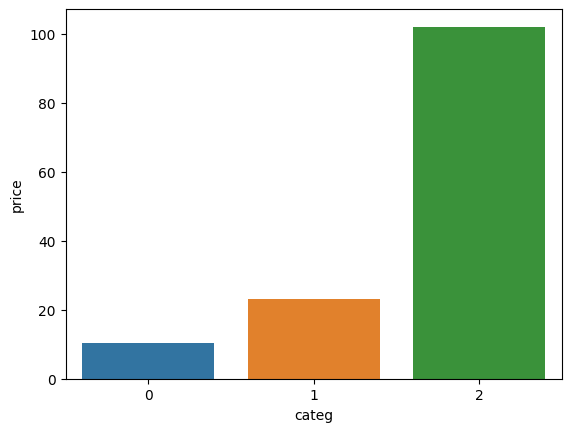

In [725]:
#Median par categorie
sns.barplot(data= median_par_categ, x="categ", y="price")

<AxesSubplot:xlabel='categ', ylabel='price'>

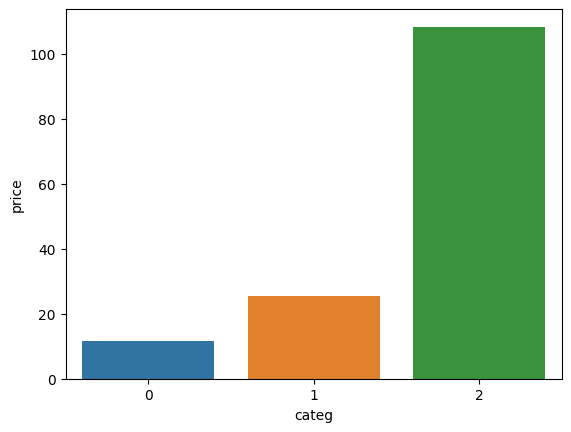

In [727]:
#Moyenne par categorie
sns.barplot(data=moyenne_par_categorie, x="categ", y="price", label="Total")

<AxesSubplot:xlabel='client_id', ylabel='price'>

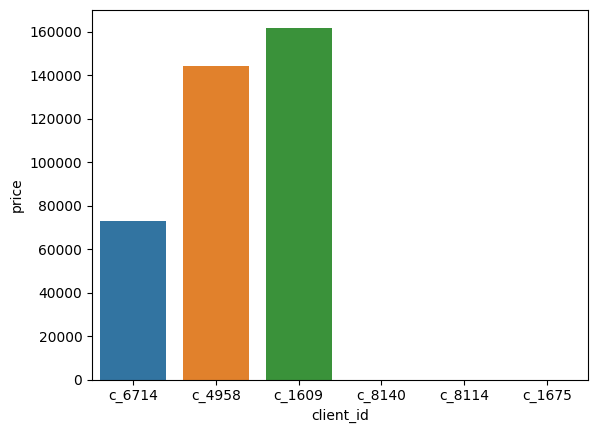

In [729]:
#comparaison entre les 5 premiers et dernier clients
sns.barplot(data=df_final5, x="client_id", y="price", label="Total")

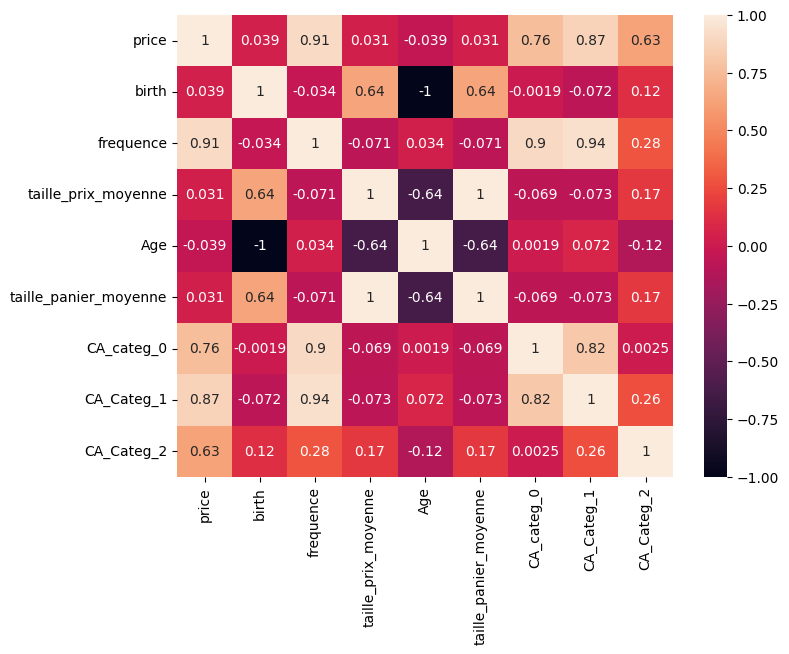

In [730]:
#Matrice de correlation 
corr_df = df_final2.corr(method="pearson")
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [753]:
#Graphique sur les frequences d'achat par groupe d'age
frequence_achat_par_age = df_final2.groupby(pd.cut(df_final2['Age'], bins=[0, 20, 50,80]))['frequence'].count().reset_index()                             
frequence_achat_par_age                            

,Age,frequence
0,"(0, 20]",437
1,"(20, 50]",4904
2,"(50, 80]",3026


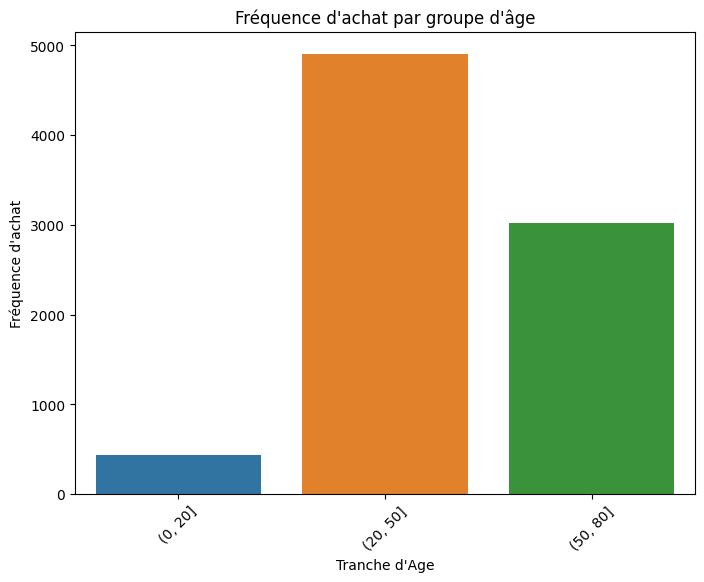

In [824]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Age', y='frequence', data=frequence_achat_par_age)
plt.title('Fréquence d\'achat par groupe d\'âge')
plt.xlabel("Tranche d'Age")
plt.ylabel('Fréquence d\'achat')
plt.xticks(rotation=45)
plt.show()

In [813]:
#Somme total des pannier moyenne par categorie
categorie_price = pd.merge(products1["categ"], df_final2["taille_panier_moyenne"], left_index=True , right_index=True)#.reset_index()
categorie_price#.dropna()

,categ,taille_panier_moyenne
0,0,4.150000
1,0,4.990000
2,0,5.570000
3,1,6.080000
4,0,6.310000
...,...,...
3282,2,35.120000
3283,0,55.188571
3284,0,29.718462
3285,1,55.195714


In [816]:
somme_par_categori = categorie_price.groupby(categorie_price['categ'])['taille_panier_moyenne'].sum().reset_index()                             
somme_par_categori

,categ,taille_panier_moyenne
0,0,80382.406067
1,1,27319.805281
2,2,8618.241411


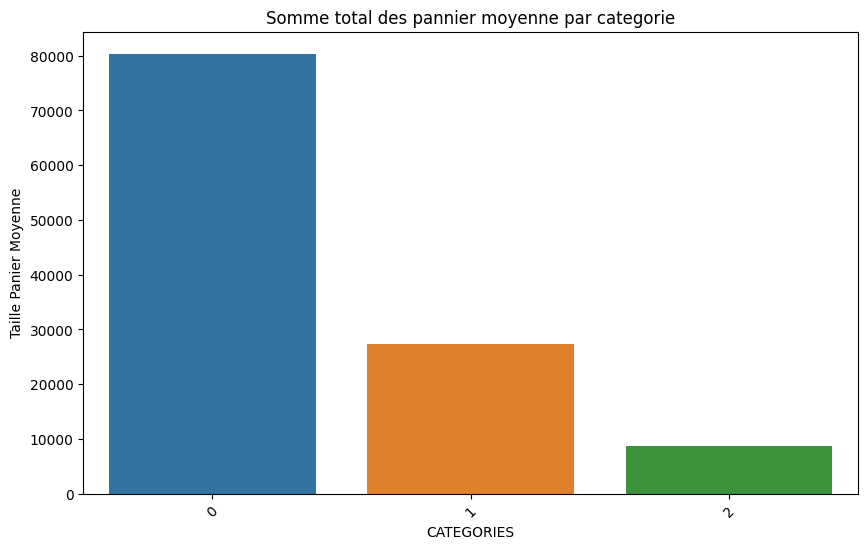

In [821]:
plt.figure(figsize=(10, 6))
sns.barplot(x='categ', y='taille_panier_moyenne', data=somme_par_categori)
plt.title("Somme total des pannier moyenne par categorie")
plt.xlabel("CATEGORIES")
plt.ylabel("Taille Panier Moyenne")
plt.xticks(rotation=45)
plt.show()